## Kernel Density

  0.391987 seconds (111.89 k allocations: 1.841 MB)
  

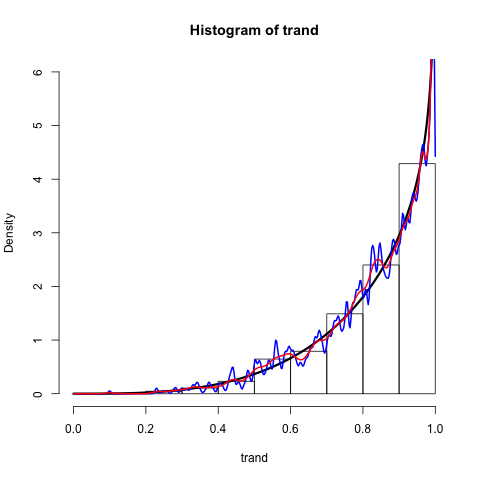

0.421843 seconds (179.03 k allocations: 9.093 MB)
NULL


In [105]:
using KernelEstimator, Distributions, RCall
trand=rand(Beta(4,.8),2000);
xs=linspace(0,1,400);
@time den1 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gaussiankernel);
@time den2 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=betakernel, lb=0.0, ub=1.0);
g = globalEnv
g[:trand] = trand
g[:xs] = xs
g[:den1]=den1
g[:den2]=den2

rprint(""" 
hist(trand, probability=T,ylim=c(0,6))
lines(x=xs, y=dbeta(xs, 4, .8), lwd=3)
lines(x=xs, y=den1, col="blue", lwd=2)
lines(x=xs, y=den2, col="red", lwd=2)
""")


  0.192637 seconds (118.38 k allocations: 1.940 MB)
  

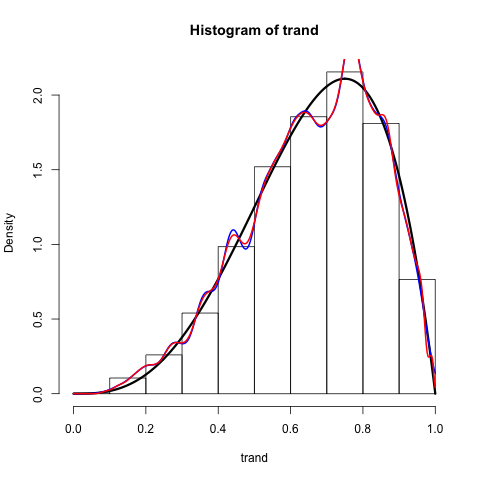

0.257162 seconds (150.63 k allocations: 8.657 MB)
NULL


In [108]:
using KernelEstimator, Distributions, RCall
trand=rand(Beta(4,2),2000);
xs=linspace(0,1,400);
@time den1 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gaussiankernel);
@time den2 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=betakernel, lb=0.0, ub=1.0);
g = globalEnv
g[:trand] = trand
g[:xs] = xs
g[:den1]=den1
g[:den2]=den2

rprint(""" 
hist(trand, probability=T)
lines(x=xs, y=dbeta(xs, 4, 2), lwd=3)
lines(x=xs, y=den1, col="blue", lwd=2)
lines(x=xs, y=den2, col="red", lwd=2)
""")


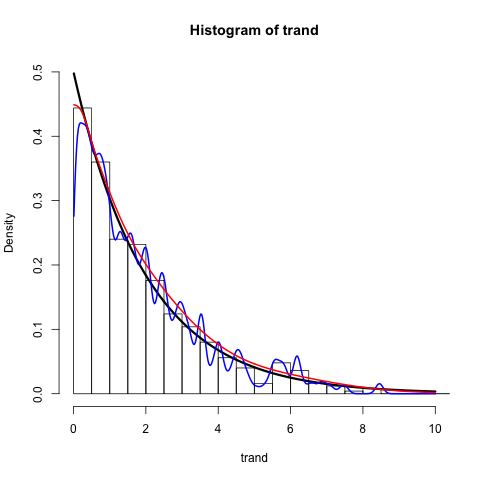

0.031780 seconds (28.05 k allocations: 515.125 KB)
  0.019237 seconds (30.11 k allocations: 563.719 KB)
NULL


In [106]:
using KernelEstimator, Distributions, RCall
trand=rand(Chisq(2), 500)
xs=linspace(0.01,10,400);
@time den1 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gaussiankernel);
@time den2 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gammakernel, lb=0.0);
g = globalEnv
g[:trand] = trand
g[:xs] = xs
g[:den1] = den1
g[:den2]=den2

rprint(""" 
hist(trand, probability=T, ylim=c(0, .5), xlim=c(0, 10), breaks=20)
lines(x=xs, y=dchisq(xs, 2), lwd=3)
lines(x=xs, y=den1, col="blue", lwd=2)
lines(x=xs, y=den2, col="red", lwd=2)
""")


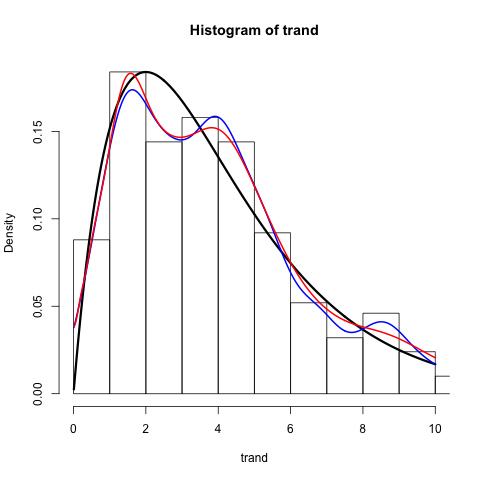

0.019659 seconds (29.70 k allocations: 542.250 KB)
  0.025086 seconds (34.29 k allocations: 630.297 KB, 12.23% gc time)
NULL


In [110]:
using KernelEstimator, Distributions, RCall
trand=rand(Chisq(4), 500)
xs=linspace(0.01,10,400);
@time den1 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gaussiankernel);
@time den2 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gammakernel, lb=0.0);
g = globalEnv
g[:trand] = trand
g[:xs] = xs
g[:den1] = den1
g[:den2]=den2

rprint(""" 
hist(trand, probability=T, xlim=c(0, 10), breaks=20)
lines(x=xs, y=dchisq(xs, 4), lwd=3)
lines(x=xs, y=den1, col="blue", lwd=2)
lines(x=xs, y=den2, col="red", lwd=2)
""")


## Regression

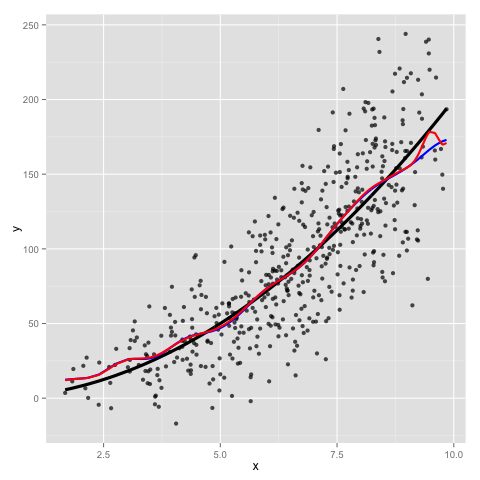

In [133]:
x = rand(Beta(4,2), 500) * 10
y=2 .* x.^2 + x .* rand(Normal(0, 5), 500)
yhat1 = localconstant(x, y)
yhat2= npr(x, y, reg=localconstant, lb=0.0, ub=10.0)
g[:x]=x
g[:y]=y
g[:yhat1]=yhat1
g[:yhat2]=yhat2
rprint("""
library(ggplot2)
ggplot()+geom_point(aes(x=x, y=y), alpha=.7) + 
geom_line(aes(x=x, y=2 * x^2), size=1.5)+
geom_line(aes(x=x, y=yhat1), color="blue", size=1)+
geom_line(aes(x=x, y=yhat2), color="red", size=1)
""")

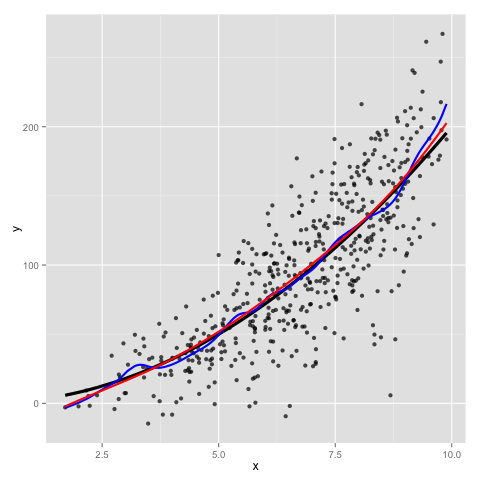

In [134]:
x = rand(Beta(4,2), 500) * 10
y=2 .* x.^2 + x .* rand(Normal(0, 5), 500)
yhat1 = locallinear(x, y)
yhat2= npr(x, y, reg=locallinear, lb=0.0, ub=10.0)
g[:x]=x
g[:y]=y
g[:yhat1]=yhat1
g[:yhat2]=yhat2
rprint("""
library(ggplot2)
ggplot()+geom_point(aes(x=x, y=y), alpha=.7) + 
geom_line(aes(x=x, y=2 * x^2), size=1.5)+
geom_line(aes(x=x, y=yhat1), color="blue", size=1)+
geom_line(aes(x=x, y=yhat2), color="red", size=1)
""")

## Confidence Band

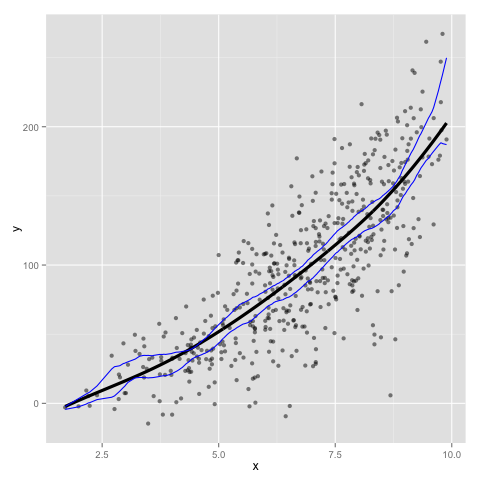

In [145]:
cb=bootstrapCB(x, y)

yhat2= npr(x, y, reg=locallinear, lb=0.0, ub=10.0)
lb = cb[1,:][:]
ub=cb[2,:][:]
g[:x]=x
g[:y]=y
g[:yhat2]=yhat2
g[:lb]=lb
g[:ub]=ub
rprint("""
ggplot()+geom_point(aes(x=x, y=y), alpha=.5) +
geom_line(aes(x=x, y=yhat2), size=1.5)+
geom_line(aes(x=x, y=lb), color="blue")+
geom_line(aes(x=x, y=ub), color="blue")
""")